## 
NAME      : RAHINI DEVI S

ROLLNO :225229129

## SMA_LABSHEET - 10(Build a recommender system based on Amazon Reviews)

In [1]:
import pandas as pd

##### Step-1

In [2]:
f=pd.read_csv("ratings_Beauty.csv")
f

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


##### Step-2

In [3]:
f.isnull()

,UserId,ProductId,Rating,Timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2023065,False,False,False,False
2023066,False,False,False,False
2023067,False,False,False,False
2023068,False,False,False,False


In [4]:
f.drop_duplicates(inplace=True)


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [5]:
f['Timestamp'] = pd.to_datetime(f['Timestamp'], unit='s')


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,2013-05-28
1,A3JM6GV9MNOF9X,0558925278,3.0,2012-12-14
2,A1Z513UWSAAO0F,0558925278,5.0,2014-07-07
3,A1WMRR494NWEWV,0733001998,4.0,2013-10-24
4,A3IAAVS479H7M7,0737104473,1.0,2010-05-19
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,2014-07-14
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,2014-07-14
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,2014-07-15
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,2014-07-17


In [6]:
f['Rating'] = f['Rating'].astype(int)


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5,2013-05-28
1,A3JM6GV9MNOF9X,0558925278,3,2012-12-14
2,A1Z513UWSAAO0F,0558925278,5,2014-07-07
3,A1WMRR494NWEWV,0733001998,4,2013-10-24
4,A3IAAVS479H7M7,0737104473,1,2010-05-19
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5,2014-07-14
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5,2014-07-14
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5,2014-07-15
2023068,AYBIB14QOI9PC,B00LPVG6V0,5,2014-07-17


##### Step-3

In [7]:
missing_values=f.isnull().sum()


UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

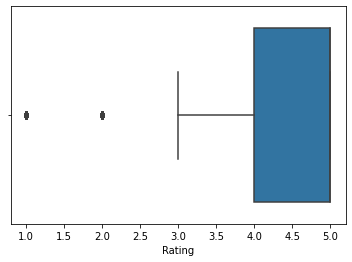

In [9]:
sns.boxplot(x=f['Rating'])
plt.show()

##### Step-4

In [10]:
!pip install surprise

In [11]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [12]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(f[['UserId', 'ProductId', 'Rating']], reader)

In [13]:
trainset, testset = train_test_split(data, test_size=0.2)
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
print("RMSE: ",rmse)

RMSE: 1.2489
RMSE:  1.2489030897752915


In [15]:
testset

[('A2PIGRB9TJBGGJ', 'B007MCWCY6', 1.0),
 ('A32K1T056DIZ2L', 'B000EVGQ0S', 3.0),
 ('A12ZKCOR90NUSV', 'B007Q0WW0S', 5.0),
 ('A1DZ4LE7RUD9JF', 'B003F7X0G6', 5.0),
 ('A7NYPPH2KTL1W', 'B001R4CL9Q', 4.0),
 ('A2OOVC8MTNQ8CT', 'B00112RH98', 5.0),
 ('AZDR7R3MJ3HAD', 'B000F4IL70', 5.0),
 ('A27VGD93W193M0', 'B0002U476G', 5.0),
 ('A2F01NCH47R16O', 'B001P24STQ', 5.0),
 ('AJ1CCLPITXMEW', 'B00GVKM29A', 5.0),
 ('AGEKVD8JPZQMT', 'B00AE07BI0', 3.0),
 ('A3DZGYD5W2WGCP', 'B001BOAL1M', 5.0),
 ('A1L0GP3TFKYV0', 'B000ULJN9S', 3.0),
 ('A3D1Q5NCY86N1F', 'B008UG4CHI', 3.0),
 ('AQV39OFIZF6JI', 'B005P0MI1E', 5.0),
 ('A3R7EQ7FPTB66T', 'B0007R7ABS', 5.0),
 ('A1EFK0YOLU4QIJ', 'B004M2Y7RY', 5.0),
 ('A1NFBMKXT55J4S', 'B006QO4BRM', 5.0),
 ('A1O94FWUS7GKE6', 'B003BR4LBS', 2.0),
 ('A3UZ2DUNTIIFWG', 'B006TWGIXG', 5.0),
 ('A2Z2MUP8JRJXEU', 'B005BG02BU', 4.0),
 ('A29RASV3VZKNND', 'B007BJ3KQ4', 4.0),
 ('A39PGIDS8XL6V2', 'B0009XH6TG', 4.0),
 ('A388C0HNNRGYF4', 'B00683MOWK', 5.0),
 ('A1KGRJSRMTYYX0', 'B00AZRGH64', 4.0),
 ('A1B

##### Step-5

In [16]:
user_id='AJ1CCLPITXMEW'
num_recommendations=5

In [17]:
all_product_ids=f['ProductId'].unique()


array(['0205616461', '0558925278', '0733001998', ..., 'B00LP2YB8E',
       'B00LPVG6V0', 'B00LU0LTOU'], dtype=object)

In [18]:
user_rated_product_ids=f[f['UserId']==user_id]['ProductId'].unique()


array(['B000C1Z66U', 'B000CNP4HO', 'B001FWXIR4'], dtype=object)

In [19]:
products_to_predict = [pid for pid in all_product_ids if pid not in user_rated_product_ids]


['0205616461',
 '0558925278',
 '0733001998',
 '0737104473',
 '0762451459',
 '1304139212',
 '1304139220',
 '130414089X',
 '130414643X',
 '1304146537',
 '130414674X',
 '1304168522',
 '1304174778',
 '1304174867',
 '1304174905',
 '1304196046',
 '1304196062',
 '1304196070',
 '1304196135',
 '1304351475',
 '1304482596',
 '1304482634',
 '1304482685',
 '1304488608',
 '1304495396',
 '1304511073',
 '1304511081',
 '1304511111',
 '130451112X',
 '1304511138',
 '1304511146',
 '1304511154',
 '1304622193',
 '1304622223',
 '1304622428',
 '1304622452',
 '1304622460',
 '1304622622',
 '1304622657',
 '1304622665',
 '1304624498',
 '1304624544',
 '1304651029',
 '1304651088',
 '130465110X',
 '1304651118',
 '1304651347',
 '1304665704',
 '1304665720',
 '130466578X',
 '1403790965',
 '1412759676',
 '1451646526',
 '1457982633',
 '1572671203',
 '1879187396',
 '1906987238',
 '1929099886',
 '1987958179',
 '3222000565',
 '322700075X',
 '3227001055',
 '3227001381',
 '3292000971',
 '3423470476',
 '360211600X',
 '40573627

In [20]:
user_predictions = [(pid, algo.predict(user_id, pid).est) for pid in products_to_predict]


[('0205616461', 4.350383408849897),
 ('0558925278', 4.363619608670541),
 ('0733001998', 4.489492456184415),
 ('0737104473', 4.008608550687943),
 ('0762451459', 4.298014426864429),
 ('1304139212', 4.3330738656200145),
 ('1304139220', 4.556953862531029),
 ('130414089X', 4.298014426864429),
 ('130414643X', 4.403598141850475),
 ('1304146537', 4.155999415762763),
 ('130414674X', 4.478367234101828),
 ('1304168522', 4.556167461791857),
 ('1304174778', 4.40458866025428),
 ('1304174867', 4.3340007909996165),
 ('1304174905', 4.427567320397709),
 ('1304196046', 4.298014426864429),
 ('1304196062', 4.233028867333859),
 ('1304196070', 3.9989407856002437),
 ('1304196135', 4.438112634004628),
 ('1304351475', 4.259280104109941),
 ('1304482596', 3.887952246366486),
 ('1304482634', 3.955493181347823),
 ('1304482685', 4.19043004889879),
 ('1304488608', 4.466713497697748),
 ('1304495396', 4.402167464702018),
 ('1304511073', 4.301689554797584),
 ('1304511081', 4.291507269796465),
 ('1304511111', 4.190489492

In [21]:
user_predictions.sort(key=lambda x: x[1], reverse=True)
top_recommendations = user_predictions[:num_recommendations]

In [22]:
def get_product_name_by_id(product_id):
    product_name = product_id_to_name_map.get(product_id, "Unknown Product")
    return product_name

In [26]:
print("Top Recommendations for User", user_id)
print("-" * 40)
for pid, rating in top_recommendations:
    print('Product ID:', pid)
    print('Predicted Rating: {:.2f}'.format(rating))
    print("-" * 20)

Top Recommendations for User A378BTXJ8HSU1X
----------------------------------------
Product ID: B000052YN7
Predicted Rating: 5.00
--------------------
Product ID: B0000536EK
Predicted Rating: 5.00
--------------------
Product ID: B0000537HB
Predicted Rating: 5.00
--------------------
Product ID: B00005V5P6
Predicted Rating: 5.00
--------------------
Product ID: B00009WO0W
Predicted Rating: 5.00
--------------------
